# Домашнее задание 2

## Работу выполнил Ковалев Евгений, студент 4 курса бакалавриата факультета математики НИУ ВШЭ

В данном домашнем задании необходимо было попрактиковаться в извлечении ключевых слов. Из предварительно собранной коллекции текстов нужно было выделить ключевые слова, используя 2 ($N + 1$, где $N$ — количество человек в группе) различных метода, сравнить и визуализировать результаты.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
from gensim.summarization import keywords
from nltk import FreqDist, Text, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from user_agent import generate_user_agent
from wordcloud import WordCloud

mystopwords = stopwords.words('russian')

c:\programdata\anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Slow version of gensim.models.doc2vec is being used


# 1

*Соберите произвольную коллекцию текстов (не забудьте описать ее в отчете).*

В качестве коллекции текстов я решил использовать стихи Пушкина с сайта http://stih.su/pushkin/. Были собраны тексты по всем рабочим ссылкам.

In [2]:
url = 'http://stih.su/pushkin/'
r = requests.get(url, headers={'User-agent':generate_user_agent()})
soup = BeautifulSoup(r.text, "html.parser")
a = soup.findAll('a')

In [3]:
links = []
for i in a:
    try:
        links.append(i['href'])
    except:
        pass

In [4]:
len(links), links

(2163,
 ['https://foxford.ru?ref=p1370322_info',
  '#content',
  'http://stih.su/',
  'http://stih.su/',
  'http://stih.su/',
  'http://stih.su/pushkin/detskie-skazki/',
  'http://stih.su/pushkin/stikhi-pushkina-dlya-detey/',
  'http://stih.su/pushkin/o-prirode/',
  'http://stih.su/pushkin/o-zime/',
  'http://stih.su/pushkin/o-vesne/',
  'http://stih.su/pushkin/o-lete/',
  'http://stih.su/pushkin/ob-oseni/',
  'http://stih.su/pushkin/o-detyakh/',
  'http://stih.su/pushkin/stikhi-pushkina-iz-shkolnoy-programmy/',
  'http://stih.su/pushkin/legkie-stihi-pushkina/',
  'http://stih.su/pushkin/korotkie-stihi-pushkina/',
  'http://stih.su/pushkin/korotkie-stihi-pushkina/korotkie-stihi-pushkina-do-16-strok/',
  'http://stih.su/pushkin/stikhi-pushkina-dlinoy-18-strok/',
  'http://stih.su/pushkin/stikhi-pushkina-dlinoy-20-strok/',
  'http://stih.su/pushkin/stikhi-pushkina-dlinoy-24-stroki/',
  'http://stih.su/pushkin/stikhi-pushkina-dlinoy-25-strok/',
  'http://stih.su/pushkin/stikhi-pushkina-dl

In [7]:
# Получаем ссылки на все стихи, которые нам интересны
# Первое стихотворение в списке: "Деревня"
# Последнее стихотворение в списке: "Известно буди всем, кто только ходит к нам..."
links_stihi = links[links.index('http://stih.su/dervnya/'):
                    (links.index('http://stih.su/izvestno-budi-vsem-kto-tolko-khodit-k-n/') + 1)]

In [8]:
links_stihi

['http://stih.su/dervnya/',
 'http://stih.su/uznik-3/',
 'http://stih.su/tucha-2/',
 'http://stih.su/son-otryvok-n2/',
 'http://stih.su/opryatney-modnogo-parketa-otryvok-iz/',
 'http://stih.su/ptichka-bozhiya-ne-znaet-otryvok-iz-poyemy/',
 'http://stih.su/v-tot-god-osennyaya-pogoda-otryvok-iz-ev/',
 'http://stih.su/oktyabr-uzh-nastupil-uzh-roshha-otryakhae/',
 'http://stih.su/zima-krestyanin-torzhestvuya-otryvok/',
 'http://stih.su/uzh-nebo-osenyu-dyshalo-otryvok-iz-evge/',
 'http://stih.su/tazit/',
 'http://stih.su/sceny-iz-rycarskikh-vremen/',
 'http://stih.su/skupoy-rycar/',
 'http://stih.su/rusalka-poyema/',
 'http://stih.su/pir-vo-vremya-chumy/',
 'http://stih.su/mocart-i-saleri/',
 'http://stih.su/monakh/',
 'http://stih.su/kamennyy-gost/',
 'http://stih.su/ispoved/',
 'http://stih.su/ezerskiy/',
 'http://stih.su/boris-godunov/',
 'http://stih.su/o-vesne-otryvok-iz-stikhotvoreniya-osen/',
 'http://stih.su/o-vesne-otryvok-iz-romana-evgeniy-oneg/',
 'http://stih.su/okh-leto-krasnoe

In [9]:
# Получаем текст стиха по ссылке
def get_text(url):
    r = requests.get(url, headers={'User-agent':generate_user_agent()})
    soup = BeautifulSoup(r.text, "html.parser")
    a = soup.find('div', class_='entry-content')
    text_row = a.text
    i = text_row.find('adsxpls={"ads":[{"w":1200,"sw":790,"sh":300}')
    return text_row[:i]

In [26]:
# Получаем коллекцию стихов
texts = []
for url in links_stihi:
    # не все ссылки рабочие
    try:
        text = get_text(url)
        texts.append(text)
    except:
        pass

In [11]:
print(texts[14])



Улица. Накрытый стол. Несколько пирующих мужчин и женщин.
Молодой человек
Почтенный председатель! я напомню
О человеке, очень нам знакомом,
О том, чьи шутки, повести смешные,
Ответы острые и замечанья,
Столь едкие в их важности забавной,
Застольную беседу оживляли
И разгоняли мрак, который ныне
Зараза, гостья наша, насылает
На самые блестящие умы.
Тому два дня наш общий хохот славил
Его рассказы; невозможно быть,
Чтоб мы в своём весёлом пированье
Забыли Джаксона! Его здесь кресла
Стоят пустые, будто ожидая
Весельчака – но он ушёл уже
В холодные подземные жилища…
Хотя красноречивейший язык
Не умолкал ещё во прахе гроба;
Но много нас ещё живых, и нам
Причины нет печалиться. Итак,
Я предлагаю выпить в его память
С весёлым звоном рюмок, с восклицаньем,
Как будто б был он жив.
Председатель
Он выбыл первый
Из круга нашего. Пускай в молчаньe
Мы выпьем в честь его.
Молодой человек
Да будет так!
Все пьют молча.
Председатель
Твой голос, милая, выводит звуки
Родимых песен с диким совершенством;

In [28]:
df_texts = pd.DataFrame(texts, columns=['poem'])
df_texts.to_csv('pushkin_poems.csv')

In [13]:
# Вводим функции, необходимые для того, чтобы обработать текст
regex = re.compile("[А-Яа-яё]+")
m = Mystem()
def tokenization(text):
    tokens = WhitespaceTokenizer().tokenize(text.lower())
    types = FreqDist(tokens)
    return tokens, types
def words_only(text, regex=regex):
    return " ".join(regex.findall(text))
def remove_stopwords(text, mystopwords = mystopwords):
    text_tokens, text_types = tokenization(text)
    try:
        return " ".join([token for token in text_tokens if (token not in mystopwords)])
    except:
        return ""
def lemmatize(text, mystem=m):
    m = Mystem()
    try:
        mystem_lemmas = m.lemmatize(text)        
        return "".join([token for token in mystem_lemmas])
    except:
        return ""

In [14]:
# Предобрабатываем текст
p = re.compile('\d{4}[ ]*г.')
for i in range(len(texts)):
    m = p.search(texts[i])
    if m != None:
        start = m.start()
        end = m.end()
        texts[i] = texts[i][:start] + texts[i][end+1:]
    texts[i] = texts[i].replace('var', '')
    texts[i] = re.sub('[\s-]', ' ', texts[i])
    texts[i] = texts[i].lower()
    texts[i] = words_only(texts[i])
    texts[i] = remove_stopwords(texts[i])
    texts[i] = lemmatize(texts[i])
    texts[i] = remove_stopwords(texts[i])

Посмотрим, как теперь выглядит вышеупомянутое стихотворение:

In [15]:
print(texts[14])

улица накрывать стол несколько пировать мужчина женщина молодой человек почтенный председатель напоминать человек очень знакомый чей шутка поводить смешной ответ острый замечание столь едкий важность забавный застольная беседа оживлять разгонять мрак который ныне зараза гостья наш насылать самый блестящий ум день наш общий хохот славить рассказ невозможно свой веселый пирование забывать джаксон кресло стоять пустой ожидать весельчак уходить холодный подземный жилище хотя красноречивый язык умолкать прах гроб живой причина печалиться итак предлагать выпивать память веселый звон рюмка восклицание б живой председатель выбывать первый круг наш пускай молчань выпивать честь молодой человек пить молча председатель твой голос милый выводить звук родимый песня дикий совершенство спеть мери уныло протяжно веселие обращаться безумный земля отлучать видение мери петь время процветать мир наш сторона воскресение бывать церковь божий полный наш ребеночек шумный школа раздаваться голос сверкать свет

In [25]:
file = open('pushkin_poems_preprocessed.txt', 'w')
for text in texts:
    file.write('%s\n' % text)
file.close()

In [2]:
#texts = []
#with open('pushkin_poems_preprocessed.txt') as file:
#    for line in file:
#        texts.append(line)

# 2

*$N + 1$ способом извлеките из коллекции ключевые слова ($N$ — количество человек в вашей группе)*

## 2.1 TF-IDF

Сначала извлечем ключевые слова с помощью TF-IDF:

In [3]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0)
tfidf_matrix =  tfidf.fit_transform(texts)
feature_names = tfidf.get_feature_names() 
data = []
dense = tfidf_matrix.todense()
for i in range(len(texts)):
    text = dense[i].tolist()[0]
    phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
    sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
    phrases = []
    scores = []
    for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:50]:
        phrases.append(phrase)
        scores.append(str(score))
    data.append([i, ' '.join(phrases), ' '.join(scores)])
df = pd.DataFrame.from_records(data, columns = ['text_id','terms', 'score'])

In [4]:
df.head()

,text_id,terms,score
0,0,труд везде рабство нива судьба злодей закон жа...,0.22842268679451633 0.16443729329792892 0.1496...
1,1,туда клевать окно вскармливать пора синеть вым...,0.3855715635587608 0.3427988830962332 0.234703...
2,2,буря земля ликующий освежаться алчный облегать...,0.2392580595651379 0.223994259076618 0.2208277...
3,3,перекрещивать уклонять умалчивать шелохнуться ...,0.22439668614865402 0.22439668614865402 0.2243...
4,4,лед падать бережно конек лапка опрятный гусь п...,0.4673145588902876 0.2924731191426911 0.203868...


In [10]:
# Здесь мы печатаем для каждого текста его id + топ ключевых слов в нем (не больше 50)
tfidf_keywords = ''
for i in range (0, len(texts)):
    print (i)
    print (df.terms[i])
    tfidf_keywords += df.terms[i] + ' '
    #print (df.score[i]) - вывод соответствующих значений TF-IDF для каждого слова в каждом тексте 

0
труд везде рабство нива судьба злодей закон жар душа барство завидывать земледелец крилат непросвещенный неугнетенный овин подвижный скирд склонность собственность учуся ваш витийство застенчивый опора пагуба полосатый уставлять человечество внимать толпа величие мания насильственный оракул присваивать роптание убийственный влачиться измученный кустарник творческий цирцея сей владелец дворовый довольство лазурный рассыпать рыбарь
1
туда клевать окно вскармливать пора синеть вымолвить задумывать сырой белеть махать пища птица темница морской решетка неволя грустный орел улетать крыло взгляд гулять крик туча товарищ вольный бросать ветер кровавый край смотреть гора звать брат сидеть хотеть лишь молодой давать свой
2
буря земля ликующий освежаться алчный облегать печалить небо лазурь листочек рассевать миноваться издавать успокаивать молния поить обвивать древо недавно грозно дождь наводить промчаться нестись ласкать таинственный сокрыться гнать туча довольно гром ветер ясный кругом уны

## 2.2 TextRank

Теперь используем TextRank:

In [11]:
textrank_keywords = ''
for i in range(len(texts)):
    print(i)
    print(' '.join(keywords(texts[i]).split()))
    textrank_keywords += ' '.join(keywords(texts[i]).split()) + ' '

0
труд везде судьба душа закон рабство твои нива сеи внимать толпа видеть злодеи ваш жар друг прекрасныи пустынныи уголок уметь сердце тревожить почто просвещенныи восходить грозныи дар отечество свобода мирныи шум дуброва тишина поле роскошныи пир забава заблуждение измученныи берег бродить
1
туда пора клевать окно решетка темница лишь сырои
2
буря земля небо туча молния грозно обвивать
3
болтливость нога прелесть детскии год любить свои
4
лед падать модныи паркет задумывать плыть
5
птичка человек весна долговечныи гнездо долг ночь свивать
6
двор зима белыи осеннии погода ярко просыпаться рано
7
свои наступать роща лаи собака уснуть
8
крестьянин торжествовать дровни больно смешно мать грозить
9
довольно осень караван стоять ноябрь
10
встреча сын жена отец око толпа тазит глава потупя иль скала долина адех двор гасуб старик конь ждать свои день ночь арба внимать шашка дорога сердце гора являться проходить кунак глядеть волна трижды чеченец могила голова родимыи сакля лежать твои отрок 

18
грешник тишина шепот мучительныи отходить давно келья тихо темно игумен грех слагать строгии свои молитва прекращать
19
свои наш езерскии сосед герои иль любить сказать ветер род труд ваш дух великии сын жаль век слава регистратор служить князь царь дон дышать отец год орел певец идти гордиться поэт толпа боярскии татарин встречать жить бывать нужда приять страшныи гнев никто прямои рожать якуб имя рука друг становиться время иван иметь мещерскии державин дед право день избирать малыи архив человек воевода гласить простои петроград тьма дорофеи рои разбирать родовои коллежскии смирныи строиныи челобитчик беспокоиныи дверь шуметь биться вал пристань набережная недвижныи влага дыхание жадно ждать нести корабль софиискии судеискии дождь известно
20
самозванец шуискии твои пушкин знать димитрии отец наш григории идти борис боярин первыи феодор царь глядеть око годунов это поити весь народ думать год государь видеть душа басман пристав день бог дом входить царскии свои принимать венец кн

71
однообразныи печальныи кладбище глядеть кругом деревянныи крест
72
царь дадон петушок шатер гора весь столица девица рать воевода царица становиться шум говорить воиско день свои встрепенуться восток проходить знать лежать беда спица оба сын вести друг колесница обращаться мудрец кричать страшныи сосед дело скопец слать отдыхать конь встречать хотеть сторона птица молвить иль сила забывать сон человек ратныи бежать темя бывало смерть граница поклон инда твои идти обертываться наш отец народ исполнять мирно молодец тридевятыи старыи видеть страх ночь высокии
73
покои давно чистыи дальнии труд обитель
74
наш черногорец француз пехота ружье красныи шапка удивиться сказать вопрошать повалиться сто двадцать человек весь отряд злои истреблять кругом
75
свои которыи время уходить жить поэт старыи гусляр иакинф магланович год похищать принимать песня несколько глаз это довольно легко сын убивать иллириискии лицо наш жена гора день похищение бывать ульян воевода обычаи стих двадцать баллада 

110
воевода пан хлопец ночь око плакать год страдать лишь белыи забор давать ружье нежныи лоб полк попадать тихо рука видеть панна сад сквозь ветвь дозор искать назад закинуть свои
111
анджело ваш наш правление дук нужно целыи вена являть совершаться ничеи немои
112
муромскии земля сказка илья
113
петь дорога светить месяц светло чистыи серебриться снег
114
свет сын дорога мчаться бурка ноша валиться прусаков русскии дом паз польша ребенок пусть молодои будрыс снег сукно третии приходить проводить отец оттуда привозить нынче еда слать победа
115
чаша третии веселыи перевод стихотворение поэт
116
мальчик стихотворение горечь фалерныи чаша вина
117
питать любовныи красота написать гармония диво сокровенныи
118
проити дева счастие сердце давать сметь мочь волнение любовь безумно
119
вниз бес издали рои гора свои ядро сеи казнь адскии огонь крутить ростовщик холодныи жареныи протяжно даль смущение дождь грешник яицо иль тухлыи разбиваться скверныи карантинныи страж курить жаровня запах
120

133
поэт камергер вера ключ любезныи заднии карман около
134
слава
135
варшава свои русскии твои россия слава вновь польша крик обида сказать наш прах бунт русь напор северныи племя сон гость бедственныи падшии враг гордыи день бородино забывать ныне гроб мятежныи право чеи звезда вести становиться пята похмелье славянов лимаиа оставаться волынь наследие богдан признавать суворовскии
136
параша дом кухарка иль жить сказать сердце мавруша глядеть уметь весь ночь старушка муза прельщать пора казаться взять вдова год дочь покров стоять свои весть наш окно крыльцо приходить становиться взор молодои думать важныи слушать слава рифма октава слог знать бог честь день туда ходить русскии беда лачужка зима воскресение входить оставлять пред долго девушка увидеть напрасно бывало сидеть бедныи давно любить мужчина добрыи старуха идти успевать видеть читать петь помнить ездить графиня звать смирение рысак змия писать инои пирожное кот блаженныи равныи дорога бои шить начинать глагол рать приводить

ругать надеяться сидеть передняя барин
200
любить печаль грузия лежать
201
онегин милыи чрез мост кокушкин александр сергеич сквозь рубашка наружу
202
гора твои келья соседство бог прощать
203
живои кремнистыи горныи стена нестись дождевои обнажаться
204
меж ветер идти корабль попутныи садиться недвижныи око заболеть товарищ жать рука приветствовать отчизна господин благодарить рыдать безмолвныи
205
василии тредьяковскии вестпик критика хлопотать снова хотеть
206
роскошныи гражданин глядеть дверь сон красавица очаровательныи афины
207
оставлять свет твои забава оставаться равныи презрение тщеславныи любовь достоиныи
208
кибитка твои калмычка пока конь праздныи душа ита ария опера итальянскии композитор галиани покидать краса
209
отвечать эпиграмма ждать безымянныи раздражение
210
подо стремнина пища утес играть громада наравне отселе видеть поток рождение зеленыи сени птица щебетать скакать первыи
211
сеи видеть ошибка бюст александр
212
среди прелесть нега бранныи слава красавец
213
я

сердце внимать уста грудь зеница касаться жажда томить пустыня восставать пророк лежать бог гад морскои
315
ваш любовь весь сказать иль ангел пора трудно обманываться рад любить отрада отвертываться тоска взгляд выражать глаз кудри
316
тень душа голубои страна невозвратимыи день свои роднои томиться
317
грозныи стенька разин волга корабль шуба отдавать поле красныи девица молодец становиться воевода удалои казак добро море синии конскии топ персидскии царевна матушка людскои
318
познакомиться однофамилица поэт речь дол
319
твои день грудь суровыи голубка черныи
320
мочь волна берег томительно вода шум сеи лобзание иль небо дыхание уста бояна славие игривыи перст кудри касаться жажда
321
ваш блаженныи идеал московскии читать проза
322
которыи бог весь мать амур
323
вода чеи дружба твои послание внушать влага пениться хмельнои
324
обращать совет играть
325
славить нептун слух древнии обвинять дело оказываться
326
твои автор статеика неприличныи
327
ухо котлета яжельбица станция валдаи пе

ваш узнавать поэт слава иль любовь сердце муза свет книгопродавец стишок писать вдохновение блаженныи таить душа чтец жизнь воображение знать сон свобода ветреныи итак решать ждать слово рукопись чудныи век восторг дар унижать красота летать труд стих память любовница юность заменять приятныи творение стон лира яркии ветхии буря шум готовыи звук толпа говорить хранить дорого шумныи шептать чистыи ночь докучныи певец пламенныи шепот надежда просить предвидеть стоить тяжкии понимать оно нужно луг луна тоска содрогание дальныи поражать вздыхать потомство герои точно гордость
396
увенчивать любовь безумныи таиныи черта письмо
397
сон день умолкать сердце свет глас прощать брат голос укоризна зов сладостныи надежда идти
398
вино часто длинныи лето пена безумныи шумныи юность сеи подобие любовь вспомнить
399
исчезать супруг красавица младои
400
твои пророк пустыня нечестивыи земля коран дрожать путник глава любить магомет бог воля небо клясться могучии утро гореть кладязь пальма свои пасть т

твои верныи конь вещии олег кудесник кость бояться друг броня князь поле ехать дружина враг могучии стрела глава рука воля чело шипеть гадание покорныи копь грядущии ковыль нога тризна холм год таиться старик брег отрок крутои прощать товарищ игорь смерть старыи свои ныне битва минувшии поминать игривыи сбываться жизнь сказать пировать видеть легкии бег море
459
пред луч пир любовница друг
460
давыдов оставлять гора деиствие выходить набекрень иметься вид часы свобода устав самыи смерть день великии жестокии ментик спина
461
твои сон огонь день желтыи жемчуг румяниться тихо волшебныи старина друг вымысел белыи игривыи благоухать грудь
462
святои
463
святои берег москва угодник
464
наместник боярин рогатыи обривать начальник пушкин сменить день сидеть арест видаться куконица муж
465
верить друг невнятныи стих прощальныи
466
иметь аглая понимать
467
вино любовь час лампада наш приют лететь веселыи друг желать здравие киприды златои чаша рука
468
чаша вчера день исчезать зашипеть скифскии

523
давыдов раевскии молиться умныи чаша долго каменка воскресать брат сын декабрист хотеть сказать слово меж генерал восстание неаполь шумныи время офицер русскии армия лишаться рука битва беседа братец говорить кровь христов например лафит иль
524
последнии светлица луч жечь
525
вино милыи пир забывать лира слава младои певец любовь друг вновь речь дружба торжественныи наш каждыи ужель веселыи собрание ветреныи которыи счастливыи муза лететь печаль чаша пред вольныи глас ложныи сердце звук хладныи готовить любить острота актриса разговор комета желать здравие брат приют утихать слово иметься александр жениться славить счастие весь осенять свод хвала свист
526
медленно радость
527
друг любовь ревнивыи свои юность надежда красавица молодои кишеневскии сослуживец приятель баратынскии прежде время подруга несправедливыи задумчивыи проказник веселыи жизнь праздник преходить
528
порядочныи
529
любовник аглая отвращение боже излишек
530
дремать милыи встреча
531
эпиграмма мир сколько поэт п

руслан витязь свои рука конь сон видеть взор душа князь голова наш сердце сказать день ночь твои лететь смелыи меч пред герои поле фарлафа око певец людмила прелесть судьба сын друг сладкии дева трепет любовь карла сеи верныи милыи глядеть вздыхать седои бежать знать страшныи черномор живои немои гора подруга бояться ехать княжна тихии холм волна ужасныи слышать кругом идти тишина шум шлем уста молодои забывать туман темныи меж находить супруга наина таиныи мрачныи становиться оставлять пора звать счастливыи надежда вода голос нежныи вновь глубокии толпа сад узнавать пустои младои дрожать небо путь рождаться борода искать хладныи досада злоба садиться сквозь седло гордыи год обнимать земля тихо грудь дремать исчезать соперник высокии владимир желание слеза тоска нога радость шапка мечта мир отец безвестныи сила финн долина старыи жизнь ветвь сидеть подъять старец любить жить русскии дух брать слава гнев юныи несчастныи щит злодеи мочь сметь лежать море колдун нести богатырь плечо полны

сон день друг бал ночь свои морфеи пускаи рука весь покои мечта свет проходить век тихии наслаждение дремать стучать веселие тень ночнои тишь средь глубокии ваш шум забывать тихо голова диван любовь волна приятныи окно томление нега час хотеть забываться сидеть любить легкии поле долина златои катиться движение приити лень глушь близ страх таинственныи чепец восторг ребенок крик брег рад дар темныи готовыи ныне клит греметь мирныи кров пустыня бродить слетать возмущать петух кисть ленивец око тишина твои взор которыи давать вкушать отрада тоска наступать прелестныи муза вкруг веселыи несчастныи призрак петь мир неверныи зреть мрак общии блаженныи позднии целыи скучныи темнеть спать старыи юныи видеть ввек сладкии шепотом рассказывать становиться мертвец подвиг бова ужас шелохнуться
662
волшебныи милыи слушать клавир песня
663
твои печаль день друг последнии уныние душа час лишь сердце любовь голос пускаи задумчивыи нести забвение фиал милыи повсюду недвижныи глаз узнавать ныне
664
внов

милыи друг любить давать свет слава добрыи свои певец феб бог автор вовсе лишь твои поэт жить которыи играть время полка иль сидеть прелестныи сердце день нежныи слеза лить становиться сын часто пить захотеть писать послание дремать весь слышать удалои являться клясться рад домик тасс пред пренести творение простои сельскии тень старушка любовь получать счастливыи горе великии смелыи час тетрадь дружба свистовыи ленивыи уголок укрываться постучаться оставить старик веселиться это знать иметься блаженныи небесныи гении грация слог часы тишина покои увы часок сметь забота белоснежныи видеть вкус лицо забвение глаз лет волна томныи око печать хвала ночь плыть небо толпа чеи богатыи тихо мечтание злато стих царь сосед навеки светлыи большои год почто парнасскии крылов близ наперсник пора грусть веселыи находить князь бесценныи цвет забывать лететь вдохновенныи грудь дар круговои лира вольтер чаша пиит кисть порывистыи томлепие льститься паркет стихотворение бронза ткань собирать сторона св

732
унылыи пастух вино наливать сатира мочь роща хлоя глаз исчезать чаша дружба счастие голова выпивать слушать лишь лес сень луна душа тишина свирель петь счастливыи веселие пить мечта милыи мрак рука вечныи резвыи фавн господин выбегать эрмии сын роза вакх венера
733
любовь наш евдокия ясныи день весна едва расцветать роза дочь
734
милыи любить лицо сущии портрет ветреность таков написать глупыи говорить стесняться школьныи скамья жеманныи
735
приятель умник
736
любовь лес сердце лить фавн фавна нога амур томныи изменять роза заря красавица небо слышать темныи нежныи цвет красота фиал свои лететь пастушка бывало бродить тихии сон лила прекрасныи филон пещера купидон страсть несчастныи кувшин сатира счастие краи свет грудь око пылать венера густои трава лежать гора сокрыть печаль слеза пленять чаша пить луна угрюмыи тьма дышать бог трепетныи напрасныи волна год вечернии томиться эрот ночь вкушать веселие покоиться голова
737
идиллия кратковременныи ссора холодныи ода написать
738
твои

# 3

*Визуализируйте результаты.*

## 3.1 TF-IDF

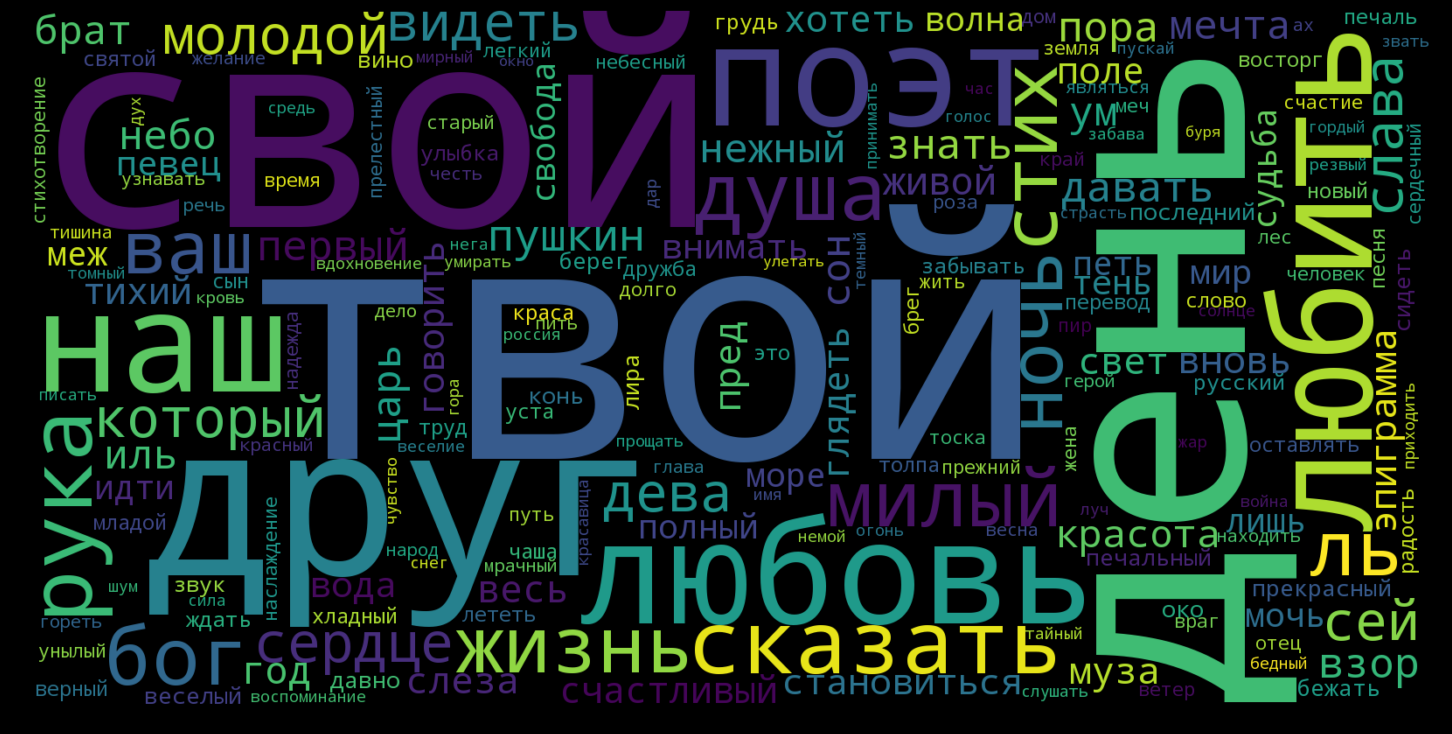

In [21]:
plt.figure(figsize=(20,10), facecolor='k')
tfidf_wordcloud = WordCloud(width=1600, height=800).generate(tfidf_keywords)
plt.imshow(tfidf_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 3.2 TextRank

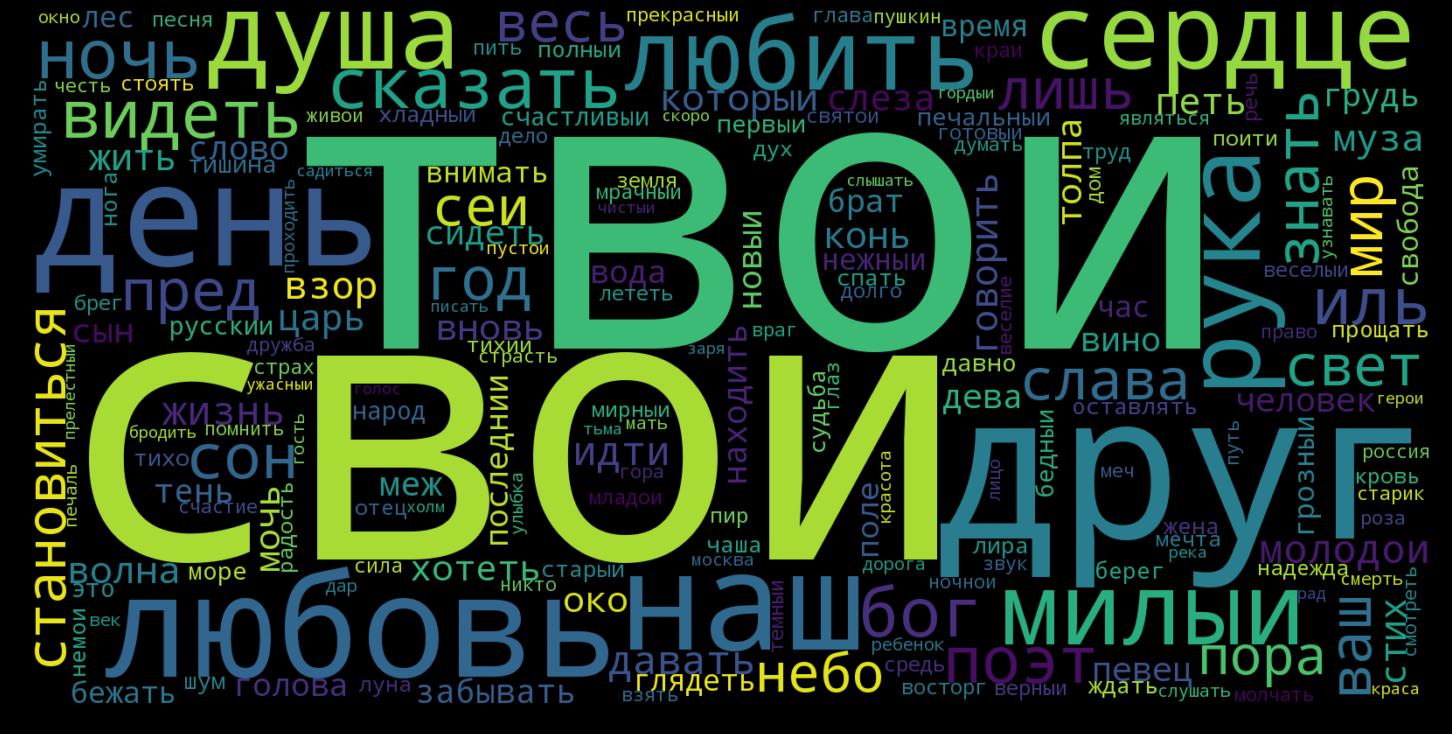

In [13]:
plt.figure(figsize=(20,10), facecolor='k')
textrank_wordcloud = WordCloud(width=1600, height=800).generate(textrank_keywords)
plt.imshow(textrank_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 4

*Сравните результаты, полученные разными способами.*

In [24]:
len(texts)

755

In [27]:
np.random.seed(13)

for i in np.random.choice(range(len(texts)), 5, replace=False):
    print(i)
    print(keywords(texts[i]))
    print('______________') # Разделение между двумя типами ключевых слов
    print(df.terms[i])
    print('\n')

641
вновь
лира
сердце
любовь надежда
день
бежать радость
хвала
твои
звонкии трепет воскресать струна нести
звук напрасно влачить
постыдныи
______________
вновь лира любовь хвала радость надежда бежать закрываться груз зажигаться постыдный добродетель погружаться хладеть оживать скорбь молния пролететь свободно дружество отлетать восторженный гул дремота разгораться расцветать праздность влачить поклонник сердце безмятежный прощаться увядший передавать воскресать живо медленно день свидетель сильно струна невольно поэзия призывать звонкий грусть воображение дубрава просыпаться трепет


459
пред луч
пир любовница друг
______________
пирование молодость свеча померкнуть бледнеть любовница долг неверный конец юноша резвый безумный исчезать луч оставаться дар гореть легкий пир дева мечта пред ночь день друг


405
умирать
слава дым
россия
сарскии село державин орлов беседа
мудрыи вести делипье
______________
дым россия умирать жена аонида блудный делипье минервой подступ сарский прозывать ав

Итак, видно, что в конкретных примерах результаты работы разных методов немного отличаются друг от друга, хотя в топе ключевых слов встречается немало одинаковых либо близких по смыслу слов. Исходя же из построенных облаков слов, можно заключить, что в целом рассматриваемые методы дают схожие результаты — наиболее частыми ключевыми словами являются местоимения «свой», «твой», «наш», существительные «душа», «любовь», «друг», «день». Что, в целом, неудивительно для Пушкина.